# Model Evaluation and Hyper-parameter Tuning

### Using Python Pipeline

In [8]:
import pandas as pd
df_dwnld = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)
df_dwnld.to_pickle('/Users/tkmacl9/Desktop/Kaggle_Competitions/Breast_Cancer_WI_pickle.pkl')

In [11]:
df = pd.read_pickle('/Users/tkmacl9/Desktop/Kaggle_Competitions/Breast_Cancer_WI_pickle.pkl')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# Define the X and y values from the dataframe just read and create a Training and test Split data before
# Passing to the pipeline
X = df.iloc[:,2:].values
y = df.iloc[:,1].values
# convert the Label using the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(455, 30)
(114, 30)
(455,)
(114,)


### Create a Pipeline with the steps of StandardScaler, PCA and Logistic Regression

In [35]:
# Create the Pipeline to fit the StandardScaler, PCA and LR model , and then score the test data set
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pline = Pipeline([('sc1', StandardScaler()), 
                  ('pca', PCA(n_components=2)), 
                  ('lr', LogisticRegression(random_state=1))])
pline.fit(X_train, y_train)
print "Test Accuracy %.3f" % pline.score(X_test,y_test)


Test Accuracy 0.947


### Compute the Stratified K-Fold Cross Validation

In [49]:
# Compute the Stratified K-Fold Cross Validation
import numpy as np
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(y=y_train, n_folds=10,random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pline.fit(X_train[train], y_train[train])
    score = pline.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold, %s, Class Dist: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))
print('CV Accuracy - %.3f, +- %.3f' % (np.mean(scores), np.std(scores)))

Fold, 1, Class Dist: [256 153], Acc: 0.891
Fold, 2, Class Dist: [256 153], Acc: 0.978
Fold, 3, Class Dist: [256 153], Acc: 0.978
Fold, 4, Class Dist: [256 153], Acc: 0.913
Fold, 5, Class Dist: [256 153], Acc: 0.935
Fold, 6, Class Dist: [257 153], Acc: 0.978
Fold, 7, Class Dist: [257 153], Acc: 0.933
Fold, 8, Class Dist: [257 153], Acc: 0.956
Fold, 9, Class Dist: [257 153], Acc: 0.978
Fold, 10, Class Dist: [257 153], Acc: 0.956
CV Accuracy - 0.950, +- 0.029


### Using the SKLearn K-Fold Cros validation Scorer

In [53]:
# Using the SKLearn K-Fold Cros validation Scorer
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator=pline, X= X_train, y=y_train, cv=10, n_jobs=1)
print('CV Scores : %s ' %scores)
print ('CV Accuracy: %.3f +- %.3f' %(np.mean(scores), np.std(scores)))

CV Scores : [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556] 
CV Accuracy: 0.950 +- 0.029


### Use learning_curve to plot the Train and Test Accuracies as Training Sample Size increases

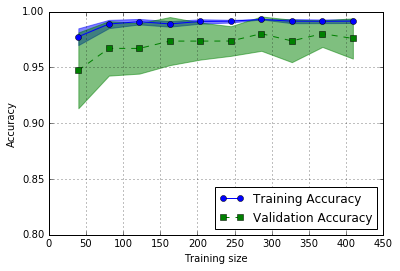

In [89]:
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
pline = Pipeline([('sl', StandardScaler()), ('lr', LogisticRegression(penalty='l2', n_jobs=1, random_state=0))])
X_train_size, train_scores, test_scores = learning_curve(estimator=pline, X=X_train, y=y_train, 
                                                         train_sizes=np.linspace(0.1, 1.0,10), cv=10,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(X_train_size, train_scores_mean, color='blue', label='Training Accuracy', marker='o')
plt.fill_between(X_train_size, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, 
                 color='blue', alpha=0.5)
plt.plot(X_train_size, test_scores_mean, color='green', label='Validation Accuracy', marker='s', linestyle='dashed')
plt.fill_between(X_train_size, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, 
                 color='green', alpha=0.5)
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.grid()
plt.show()